# Logistic Regression

In [8]:
## Import libraries & modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score  ## evaluate the model

## Import data

In [3]:
# Read file
from deezerData import readData
df, X, y, X_train, X_test, y_train, y_test = readData()

# Making arrays from the imported data
X, y, X_train, X_test, y_train, y_test = X.values, y.values, X_train.values, X_test.values, y_train.values, y_test.values

## Way 1: Hyperparameter tuning with GridSearchCV


Logistic regression also has a regularization parameter: *C*.  *C* controls the inverse of the regularization strength, and this is what we will tune in this section. A large *C* can lead to an overfit model, while a small  can lead to an underfit model.

In [10]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l2'}
Best score is 0.6740181670330204


### Fitting the model

After the hyperparameter tunning, let's fit model based on the best parameters of *C* and penalty:

In [13]:
# Model with chosen params from above
logreg_final = LogisticRegression(C=1e-05, penalty='l2')

# Fit it to the training data
logreg_final.fit(X_train, y_train)

# Prediction
y_pred = logreg_final.predict(X_test)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_final.predict_proba(X_test)[:,1]

### Evaluating the model

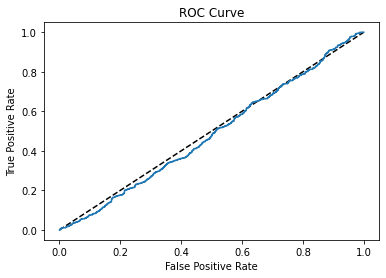

0.6723404255319149

In [15]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

logreg_final.score(X_test, y_test)

In [16]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute and print AUC score
print("AUC of logistic regression: {}".format(roc_auc_score(y_test, y_pred)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg_final, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

[[   0  847]
 [   0 1738]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.67      1.00      0.80      1738

    accuracy                           0.67      2585
   macro avg       0.34      0.50      0.40      2585
weighted avg       0.45      0.67      0.54      2585

AUC of logistic regression: 0.5
AUC scores computed using 5-fold cross-validation: [0.50303441 0.4297169  0.48738353 0.50525403 0.50069714]


## Way 2: Fitting the simple model without tunning and dropping the time stamp column


In [18]:
## Remove time stamp column from the dataset 
X_2 = df.drop(["is_listened","ts_listen"], axis=1).values
y_2 = y

## Train Test Split: 80% train data and 20% test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20,
                                                    random_state=123)

In [20]:
lr = LogisticRegression()
lr.fit(X_train_2, y_train_2)
y_pred_2 = lr.predict(X_test_2)
lr.score(X_test_2, y_test_2)

0.6723404255319149

In [22]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test_2, y_pred_2))
print(classification_report(y_test_2, y_pred_2))

# Compute predicted probabilities: y_pred_prob
y_pred_2_prob = lr.predict_proba(X_test_2)[:,1]

[[   0  847]
 [   0 1738]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.67      1.00      0.80      1738

    accuracy                           0.67      2585
   macro avg       0.34      0.50      0.40      2585
weighted avg       0.45      0.67      0.54      2585



In [23]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_2, y_pred_2_prob)))

# Compute cross-validated AUC scores: cv_auc2
cv_auc2 = cross_val_score(lr, X,y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc2))

AUC: 0.5621251068212048
AUC scores computed using 5-fold cross-validation: [0.47803346 0.53580567 0.52314612 0.4569857  0.43095315]
